In [1]:
import os
import sys
import glob
import scipy
import sklearn
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('display.max_rows', 100)
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['pdf.fonttype'] = 42
pd.set_option('display.max_columns', 100)

sns.set_palette("Set2")


In [2]:
DLOC = '/LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/'

data_loc = '/home/mattolm/user_data/IndianMicrobiome/tables/'
fig_loc = '/home/mattolm/user_data/IndianMicrobiome/figures/'
Pdb = pd.read_csv(data_loc + 'IndianMicrobiome_basicinfo_v3.csv')
Pdb = Pdb.drop_duplicates()
Pdb


sample                                              read1  \
0      AK_SR_1  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
1      AK_SR_2  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
3    AK_SR_2.2  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
5      AK_SR_3  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
6      AK_SR_4  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
..         ...                                                ...   
109      TS8_B  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
110     TS12_A  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
111     TS12_B  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
112     TS14_A  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
113     TS14_B  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   

                                                 read2            library_key  \
0    s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...    LibPlate-A2_AK-SR-1   
1    s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...    LibPlate-A4_AK-SR-2   
3    s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...  LibPlate-D2_AK-SR-2-2   
5    s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...    LibPlate-A6_AK-SR-3   
6    s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...    LibPlate-A8_AK-SR-4   
..                                                 ...                    ...   
109  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...      LibPlate-P4_TS8-B   
110  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...     LibPlate-B6_TS12-A   
111  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...     LibPlate-D6_TS12-B   
112  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...     LibPlate-F6_TS14-A   
113  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...     LibPlate-H6_TS14-B   

     DNA_concentration sample_type fecal_sample     pairs       bases  \
0                 51.5       fecal      AK_SR_1  24276525  6938547858   
1                 28.7       fecal      AK_SR_2  25189547  7192762783   
3                 92.8       fecal      AK_SR_2  11357247  3183231459   
5                411.8       fecal      AK_SR_3   5682989  1595248519   
6                 83.3       fecal      AK_SR_4   5552061  1578724021   
..                 ...         ...          ...       ...         ...   
109                NaN  enrichment      AK_SW_8   6058407  1715849529   
110                NaN  enrichment     AK_SW_12  10370419  2951418443   
111                NaN  enrichment     AK_SW_12   4568279  1283287093   
112                NaN  enrichment     AK_SW_14   2789460   786041399   
113                NaN  enrichment     AK_SW_14   6605728  1864917112   

     raw_pairs    raw_bases          RL  sample_name individual_id sample_id  \
0     40041788  11692202096  142.906529          SR1           SR1   st.t.R1   
1     30917233   9027832036  142.772770        SR2-2         SR2.2   st.R2.2   
3     20045323   5853234316  140.140980        SR2-2         SR2.2   st.R2.2   
5     11410676   3331917392  140.352948          SR3           SR3     st.R3   
6      6520759   1904061628  142.174593          SR4           SR4     st.R4   
..         ...          ...         ...          ...           ...       ...   
109   10693765   3122579380  141.608968   AK-SW8_S59            W8     st.W8   
110   15786166   4609560472  142.299865  AK-SW12_S62           W12    st.W12   
111    8792416   2567385472  140.456296  AK-SW12_S62           W12    st.W12   
112    3550125   1036636500  140.894904  AK-SW14_S63           W14    st.W14   
113   12453511   3636425212  141.159090  AK-SW14_S63           W14    st.W14   

    Gender   Age    BMI  Tribe  Village      Region  Terrain  \
0        F  31.0    NaN  Kabui  Longsai  North-East    Hills   
1        M  55.0    NaN  Kabui  Longsai  North-East    Hills   
3        M  55.0    NaN  Kabui  Longsai  North-East    Hills   
5        F  35.0    NaN  Kabui  Longsai  North-East    Hills   
6        M  39.0    NaN  Kabui  Longsai  North-E

In [3]:
IMdb = pd.read_csv(data_loc + 'IndianMicrobiome_deNovoGenomes_all_v1.csv')
IMdb

genome  completeness  \
0     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGE...         23.21   
1     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGE...         52.05   
2     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGE...         27.59   
3     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGE...          9.48   
4     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGE...         59.98   
...                                                 ...           ...   
1549  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGE...          8.78   
1550  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGE...         79.08   
1551  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGE...         98.09   
1552  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGE...         13.71   
1553  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGE...         19.31   

      contamination  strain_heterogeneity   length    N50  centrality  \
0              0.00                   0.0   835783   2834    0.000000   
1              0.72                  50.0  1384450   2963    0.961970   
2              0.00                   0.0   680433   2700    0.000000   
3              0.00                   0.0   271233   2397    0.000000   
4              3.57                  50.0  1348921   4075    0.969759   
...             ...                   ...      ...    ...         ...   
1549           0.00                   0.0  1173336   2516    0.000000   
1550           1.18                  75.0  1892156   5709    0.000000   
1551           0.37                  20.0  5690468  25955    0.996012   
1552           0.00                   0.0   436184   2097    0.000000   
1553           0.00                   0.0  1070784   2526    0.000000   

      pass_filters      score v1_cluster  v1_rep v2_cluster  v2_rep  \
0            False        NaN        NaN   False        NaN   False   
1             True  50.557835       45_1   False        NaN   False   
2            False        NaN        NaN   False        NaN   False   
3            False        NaN        NaN   False        NaN   False   
4             True  45.739823      196_1   False        NaN   False   
...            ...        ...        ...     ...        ...     ...   
1549         False        NaN        NaN   False        NaN   False   
1550          True  74.993280      199_2    True     1101_2    True   
1551          True  98.567122      111_1   False        NaN   False   
1552         False        NaN        NaN   False        NaN   False   
1553         False        NaN        NaN   False        NaN   False   

                                         classification origin_sample  \
0                                                   NaN      AK_SG_10   
1                                                   NaN      AK_SG_10   
2                                                   NaN      AK_SG_10   
3                                                   NaN      AK_SG_10   
4                                                   NaN      AK_SG_10   
...                                                 ...           ...   
1549                                                NaN         TS8_B   
1550  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...         TS8_B   
1551                                                NaN         TS8_B   
1552                                                NaN         TS8_B   
1553                                                NaN         TS8_B   

     sample_type   Region                                             s3_loc  \
0          fecal  Central  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
1          fecal  Central  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
2          fecal  Central  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
3          fecal  Central  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
4          fecal  Central  s3://czbiohub-microbiome/Sonnenburg_Lab/Indian...   
...          ...      ...                                                ...   
1549 

In [19]:
Fdb = IMdb[IMdb['v1_rep'] == True]
Fdb['species'] = [x.split(';')[-1][3:] if x == x else np.nan for x in Fdb['classification']]
Fdb['phylum'] = [x.split(';')[1][3:] if x == x else np.nan for x in Fdb['classification']]
Fdb['genus'] = [x.split(';')[-2][3:] if x == x else np.nan for x in Fdb['classification']]
Fdb['family'] = [x.split(';')[-3][3:] if x == x else np.nan for x in Fdb['classification']]
Fdb['novel_species'] = [x == '' for x in Fdb['species']]

print(len(Fdb[Fdb['novel_species'] == True]))
import subprocess

for l in Fdb[Fdb['novel_species'] == True]['mac_loc'].tolist():
    cmd = f"cp {l} /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/SendingAbhijit/"
#     subprocess.call(cmd, shell=True)

Fdb.to_csv("/LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/SendingAbhijit/NovelGenomeInfo_v1.csv", index=False)


18


/home/mattolm/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mattolm/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mattolm/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

# Nice; save and print some facts

In [192]:
import warnings
warnings.filterwarnings("ignore")

In total we recovered 1554 genomes. 760 passed basic filters. Together these form 246 species
46 species came from enrichment samples; the rest from fecal samples


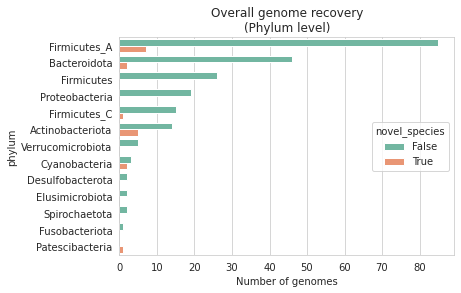

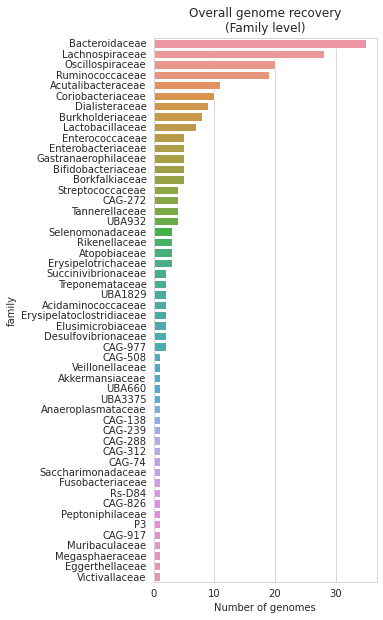

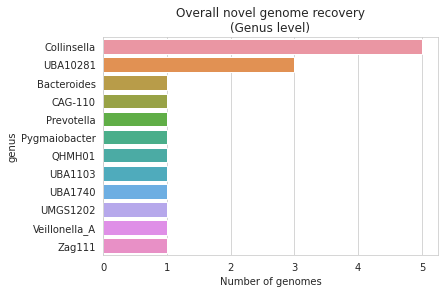

In [193]:
print(f"In total we recovered {len(IMdb)} genomes. {len(IMdb[IMdb['pass_filters'] == True])} passed basic filters. Together these form {len(IMdb['v1_cluster'].unique()) - 1} species")

Fdb = IMdb[IMdb['v1_rep'] == True]
Fdb['species'] = [x.split(';')[-1][3:] if x == x else np.nan for x in Fdb['classification']]
Fdb['phylum'] = [x.split(';')[1][3:] if x == x else np.nan for x in Fdb['classification']]
Fdb['genus'] = [x.split(';')[-2][3:] if x == x else np.nan for x in Fdb['classification']]
Fdb['family'] = [x.split(';')[-3][3:] if x == x else np.nan for x in Fdb['classification']]
Fdb['novel_species'] = [x == '' for x in Fdb['species']]

print(f"{len(Fdb[Fdb['sample_type'] == 'enrichment'])} species came from enrichment samples; the rest from fecal samples")

fdb = Fdb[~Fdb['classification'].isna()].groupby(['phylum', 'novel_species'])['genome'].agg('count').to_frame().reset_index()
fdb['genome'] = fdb['genome'].astype(int)
fdb = fdb.sort_values('genome', ascending=False)
sns.barplot(data=fdb, y='phylum', x='genome', hue='novel_species')
plt.xlabel("Number of genomes")
plt.title("Overall genome recovery\n(Phylum level)")
plt.gcf().savefig(fig_loc + 'genomeRecovery_1.png', bbox_inches='tight', dpi=300)
plt.show()

fdb = Fdb[~Fdb['classification'].isna()].groupby(['family'])['genome'].agg('count').to_frame().reset_index()
fdb['genome'] = fdb['genome'].astype(int)
fdb = fdb.sort_values('genome', ascending=False)
sns.barplot(data=fdb, y='family', x='genome')
plt.xlabel("Number of genomes")
plt.gcf().set_size_inches(4, 10)
plt.title("Overall genome recovery\n(Family level)")
plt.gcf().savefig(fig_loc + 'genomeRecovery_2.png', bbox_inches='tight', dpi=300)
plt.show()

fdb = Fdb[(~Fdb['classification'].isna()) & (Fdb['novel_species'] == True)].groupby(['genus'])['genome'].agg('count').to_frame().reset_index()
fdb['genome'] = fdb['genome'].astype(int)
fdb = fdb.sort_values('genome', ascending=False)
sns.barplot(data=fdb, y='genus', x='genome')
plt.xlabel("Number of genomes")
plt.title("Overall novel genome recovery\n(Genus level)")
plt.gcf().savefig(fig_loc + 'genomeRecovery_3.png', bbox_inches='tight', dpi=300)
plt.show()



## Create IM_genomeSetAlpha

In [194]:
# Load the Cdb
AACdb = load_coverage_report2('s3://czbiohub-microbiome/Sonnenburg_Lab/IndianMicrobiome/XDATA_ANALYSIS/DEREPLICATION/genomeSetAlpha/AlphadRep_v2/drep_output/data_tables/Cdb.csv',
                            sep=',')

In [195]:
Udb = pd.read_csv('/LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/genomes-nr_metadata.tsv', sep='\t')
Udb.head()

Genome Original_name Study_set Genome_type   Length  N_contigs  \
0  GUT_GENOME000001    11861_6_55       HBC     Isolate  3219614        137   
1  GUT_GENOME000002    11861_6_56       HBC     Isolate  3295906         82   
2  GUT_GENOME000003    11861_6_57       HBC     Isolate  4193964        120   
3  GUT_GENOME000004    11861_6_58       HBC     Isolate  4433090        100   
4  GUT_GENOME000005    11861_6_59       HBC     Isolate  3011630         45   

      N50  GC_content  Completeness  Contamination  CMseq  rRNA_5S  rRNA_16S  \
0   47258       28.26         98.59           0.70    NaN    88.24     99.74   
1   96078       38.19         99.33           1.34    NaN    83.19     98.76   
2   81111       41.36         98.52           0.00    NaN     0.00     90.41   
3  109266       42.60         99.37           0.00    NaN    82.35     95.37   
4  172321       40.46         99.12           0.58    NaN     0.00     99.67   

   rRNA_23S  tRNAs Genome_accession       Species_rep MGnify_accession  \
0     99.83     20              NaN  GUT_GENOME000001  MGYG-HGUT-00001   
1     99.83     20              NaN  GUT_GENOME001689  MGYG-HGUT-00262   
2     77.81     20              NaN  GUT_GENOME096067  MGYG-HGUT-01338   
3     86.19     19              NaN  GUT_GENOME000004  MGYG-HGUT-00002   
4     99.62     20              NaN  GUT_GENOME001575  MGYG-HGUT-00249   

                                                                                                                   Lineage  \
0          d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Peptostreptococcaceae;g__GCA-900066495;s__   
1  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Eubacterium_E;s__Eubacterium_E hallii   
2        d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Blautia_A;s__Blautia_A wexlerae   
3     d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Blautia_A;s__Blautia_A sp900066165   
4  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Faecalicatena;s__Faecalicatena faecis   

  Sample_accession Study_accession         Country Continent  \
0        ERS370061       ERP105624  United Kingdom    Europe   
1        ERS370062       ERP105624  United Kingdom    Europe   
2        ERS370063       ERP105624  United Kingdom    Europe   
3        ERS370064       ERP105624  United Kingdom    Europe   
4        ERS370065       ERP105624  United Kingdom    Europe   

                                                                                                                                              FTP_download  
0  ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-000/MGYG-HGUT-00001/genomes1/GUT_GENOME000001.gff.gz  
1  ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-002/MGYG-HGUT-00262/genomes1/GUT_GENOME000002.gff.gz  
2  ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-013/MGYG-HGUT-01338/genomes3/GUT_GENOME000003.gff.gz  
3  ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-000/MGYG-HGUT-00002/genomes1/GUT_GENOME000004.gff.gz  
4  ftp://ftp.ebi.ac.uk/pub/databases/metagenomics/mgnify_genomes/human-gut/v1.0/all_genomes/MGYG-HGUT-002/MGYG-HGUT-00249/genomes1/GUT_GENOME000005.gff.gz

In [210]:
ACdb = AACdb[['genome', 'secondary_cluster']]

# Create info sheet, stating with UHGG
db1 = Udb.copy()
db1['genome'] = db1['Genome'] + '.fna.fa'
db1['mac_loc'] = ['/LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/' + x for x in db1['genome']]
db1 = db1.rename(columns={'Lineage':'classification'})
db1['source'] = 'UHGG'
db1['score'] = 0
db1 = db1[['genome', 'classification', 'score', 'source', 'mac_loc']]

# Create IMdb info sheet
db2 = IMdb[IMdb['v1_rep'] == True]
db2['source'] = 'IM'
db2 = db2[['genome', 'classification', 'score', 'source', 'mac_loc']]

Idb = pd.concat([db1, db2]).reset_index(drop=True)

# Add info
ACdb = pd.merge(ACdb, Idb, how='left')

# Call v2 reps
ACdb = ACdb.rename(columns={'secondary_cluster':'v2_cluster'})
REPS = set(ACdb.sort_values('score', ascending=False).drop_duplicates(subset=['v2_cluster'])['genome'])
ACdb['v2_rep'] = [x in REPS for x in ACdb['genome']]
ACdb


genome v2_cluster  \
0     GUT_GENOME013238.fna.fa        1_0   
1     GUT_GENOME057850.fna.fa        2_0   
2     GUT_GENOME157195.fna.fa        3_0   
3     GUT_GENOME238203.fna.fa        4_0   
4     GUT_GENOME243020.fna.fa        5_0   
...                       ...        ...   
4885  GUT_GENOME263866.fna.fa     3292_2   
4886  GUT_GENOME284871.fna.fa     3293_0   
4887  GUT_GENOME096401.fna.fa     3294_0   
4888  GUT_GENOME111314.fna.fa     3295_0   
4889  GUT_GENOME237836.fna.fa     3296_0   

                                                                                                                       classification  \
0                                               d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;g__;s__   
1                                               d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;g__;s__   
2                                              d__Bacteria;p__Myxococcota;c__Bradimonadia;o__Bradymonadales;f__UBA4248;g__UBA4248;s__   
3                                        d__Bacteria;p__Verrucomicrobiota;c__Lentisphaeria;o__Victivallales;f__UBA1829;g__UBA1732;s__   
4                     d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella amnii   
...                                                                                                                               ...   
4885  d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Faecalicoccus;s__Faecalicoccus pleomorphus   
4886                           d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Faecalicoccus;s__   
4887   d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Faecalitalea;s__Faecalitalea cylindroides   
4888                                   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Christensenellales;f__Christensenellaceae;g__;s__   
4889          d__Archaea;p__Halobacterota;c__Methanomicrobia;o__Methanomicrobiales;f__Methanocorpusculaceae;g__Methanocorpusculum;s__   

      score source  \
0       0.0   UHGG   
1       0.0   UHGG   
2       0.0   UHGG   
3       0.0   UHGG   
4       0.0   UHGG   
...     ...    ...   
4885    0.0   UHGG   
4886    0.0   UHGG   
4887    0.0   UHGG   
4888    0.0   UHGG   
4889    0.0   UHGG   

                                                                             mac_loc  \
0     /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME013238.fna.fa   
1     /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME057850.fna.fa   
2     /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME157195.fna.fa   
3     /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME238203.fna.fa   
4     /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME243020.fna.fa   
...                                                                              ...   
4885  /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME263866.fna.fa   
4886  /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME284871.fna.fa   
4887  /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME096401.fna.fa   
4888  /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME111314.fna.fa   
4889  /LAB_DATA/DATABASES/UHGG/MO_UHGG_v1/individual_genomes/GUT_GENOME237836.fna.fa   

      v2_rep  
0       True  
1       True  
2       True  
3       True  
4       True  
...      ...  
4885    True  
4886    True  
4887    True  
4888    True  
4889    True  

[4890 rows x 7 columns]

## Print the final stuff

In [217]:
# Find genomes that aren't in UHGG
unique_clusters = []
for c, db in ACdb.groupby('v2_cluster'):
    if 'UHGG' not in set(db['source']):
        unique_clusters.append(c)
print(len(unique_clusters))

ACdb[ACdb['v2_cluster'].isin(unique_clusters)]

20


genome  \
106   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_27.10.fa   
431    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_16.4.fa   
881      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS14_B.2.fa   
1029   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_2.21.fa   
1228   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.3.fa   
1356   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_33.8.fa   
1357   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_5.27.fa   
1358  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_15.17.fa   
2018   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_3.19.fa   
2056      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__RS5_A.4.fa   
2288     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS5_A.10.fa   
2583    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS12_A.12.fa   
2738  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_49.28.fa   
2739    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_2.1.fa   
2740    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_3.3.fa   
2741   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_12.7.fa   
2742  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_48.20.fa   
2897    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_4.1.fa   
3489  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_40.15.fa   
4284    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_4.6.fa   

     v2_cluster  \
106        82_2   
431       340_2   
881       689_0   
1029      791_2   
1228     856_95   
1356    856_190   
1357    856_191   
1358    856_192   
2018     1112_5   
2056     1142_2   
2288     1312_2   
2583     1513_2   
2738     1620_4   
2739     1620_5   
2740     1620_6   
2741     1620_7   
2742     1620_8   
2897     1714_2   
3489     2209_2   
4284     2822_3   

                                                                                                                            classification  \
106                              d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__RF32;f__CAG-977;g__UBA2903;s__UBA2903 sp900768465   
431                  d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp900551275   
881                                       d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__   
1029          d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Eggerthellaceae;g__CAAEEV01;s__CAAEEV01 sp900754955   
1228                         d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella;s__   
1356                         d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella;s__   
1357                         d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella;s__   
1358                         d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella;s__   
2018   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Faecalibacterium;s__Faecalibacterium prausnitzii   
2056                                  d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Pygmaiobacter;s__   
2288                                      d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__UMGS1202;s__   
2583  d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Citrobacter;s__Citrob

## Export

In [225]:
for i, row in ACdb[ACdb['v2_rep'] == True].iterrows():
    cmd = f"cp {row['mac_loc']} /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/IM_genomeSetAlpha/indvidual_genomes/"
    subprocess.call(cmd, shell=True)

## Save

In [226]:
ACdb.to_csv(data_loc + 'IM_genomeSetAlpha_v1.csv', index=False)


In [247]:
set(Wdb['genome']) - set(Rdb['genome'])

{'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_25.7.fa',
 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_32.11.fa',
 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_35.16.fa',
 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_49.6.fa',
 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_2.8.fa',
 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_3.12.fa',
 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_4.9.fa',
 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS5_A.11.fa'}

In [241]:
ACdb[ACdb['classification'].isna()]

genome  \
355     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_4.9.fa   
403     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_2.8.fa   
414    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_3.12.fa   
972    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_49.6.fa   
1135   METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_25.7.fa   
2357  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_32.11.fa   
2360  METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_35.16.fa   
4510     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS5_A.11.fa   

     v2_cluster classification      score source  \
355       283_1            NaN  91.295204     IM   
403       325_1            NaN  83.818251     IM   
414       333_1            NaN  83.980552     IM   
972       755_1            NaN  93.243360     IM   
1135     856_13            NaN  81.306335     IM   
2357     1362_2            NaN  97.418735     IM   
2360     1363_1            NaN  71.981569     IM   
4510     2993_1            NaN  86.665467     IM   

                                                                                                                                                                                                 mac_loc  \
355     /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/de_novo_genomes/v1/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_4.9.fa   
403     /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/de_novo_genomes/v1/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_2.8.fa   
414    /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/de_novo_genomes/v1/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_3.12.fa   
972    /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/de_novo_genomes/v1/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_49.6.fa   
1135   /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/de_novo_genomes/v1/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_25.7.fa   
2357  /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/de_novo_genomes/v1/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_32.11.fa   
2360  /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/de_novo_genomes/v1/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SK_35.16.fa   
4510     /LAB_DATA/CURRENT/CURRENT_Metagenomics_PROJECTS/2021_RAMP_Indian_Microbiome/IndianMicrobiomeData/de_novo_genomes/v1/METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS5_A.11.fa   

      v2_rep  
355     True  
403     True  
414     True  
972     True  
1135    True  
2357    True  
2360    True  
4510    True

In [244]:
Rdb[Rdb['genome'] == 'METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SR_4.9.fa']

Empty DataFrame
Columns: [user_genome, classification, fastani_reference, fastani_reference_radius, fastani_taxonomy, fastani_ani, fastani_af, closest_placement_reference, closest_placement_radius, closest_placement_taxonomy, closest_placement_ani, closest_placement_af, pplacer_taxonomy, classification_method, msa_percent, translation_table, red_value, genome]
Index: []

In [245]:
Rdb

user_genome  \
0     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_10.3   
1    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_11.10   
2    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_15.14   
3    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_15.20   
4    METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__AK_SG_15.25   
..                                                                           ...   
233     METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS5_A.10   
234      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS5_A.4   
235      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS5_A.5   
236      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS5_A.6   
237      METABAT215_SUBJECTMAPPING_SCAFFOLDS_1500_MERGED_K77_METASPADES__TS8_B.6   

                                                                                                                                                  classification  \
0                                                  d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella;s__   
1                                                     d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__ER4;s__ER4 sp900550165   
2                                        d__Bacteria;p__Firmicutes_A;c__Clostridia_A;o__Christensenellales;f__Borkfalkiaceae;g__UBA10281;s__UBA10281 sp900767885   
3    d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Acidaminococcales;f__Acidaminococcaceae;g__Phascolarctobacterium_A;s__Phascolarctobacterium_A succinatutens   
4                                          d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Prevotella;s__Prevotella sp900767615   
..                                                                                                                                                           ...   
233                                                             d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__UMGS1202;s__   
234                              d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Tannerellaceae;g__Parabacteroides;s__Parabacteroides sp900541965   
235                                       d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__Bacteroides fragilis_A   
236                                 d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides;s__Bacteroides thetaiotaomicron   
237                                              d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__SFJ001;s__SFJ001 sp004555865   

    fastani_reference  fastani_reference_radius  \
0                 NaN                       NaN   
1     GCA_900550165.1                      95.0   
2     GCF_900767885.1                      95.0   
3     GCF_000188175.1                      95.0   
4     GCA_900767615.1                      95.0   
..                ...                       ...   
233               NaN                       NaN   
234   GCA_900541965.1                      95.0   
235   GCF_002849695.1                      95.0   
236   GCF_000011065.1                      95.0   
237   GCA_004555865.1                      95.0   

                                                                                                                                                fastani_taxonomy  \
0                                                                                                                                                            NaN   
1                                                     d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__ER4;s__ER4 s